In [4]:
!pip install networkx python-igraph cdlib

In [5]:
!pip freeze > requirements.txt

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib.algorithms import leiden
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import pandas as pd

In [7]:
DATA_FOLDER = './data/'
EJ_A = 'amazon_graph.graphml'

ROUTE_EJ_A = DATA_FOLDER + EJ_A

# Apartado A - Detección de comunidades con el algoritmo de Leiden

In [8]:
amazon_graph = nx.read_graphml(ROUTE_EJ_A)

In [9]:
num_nodes = amazon_graph.number_of_nodes()

# Visualizar información básica del grafoprint(f"Número de nodos: {num_nodes}")
print(f"Número de aristas: {num_edges}")    

NameError: name 'num_edges' is not defined

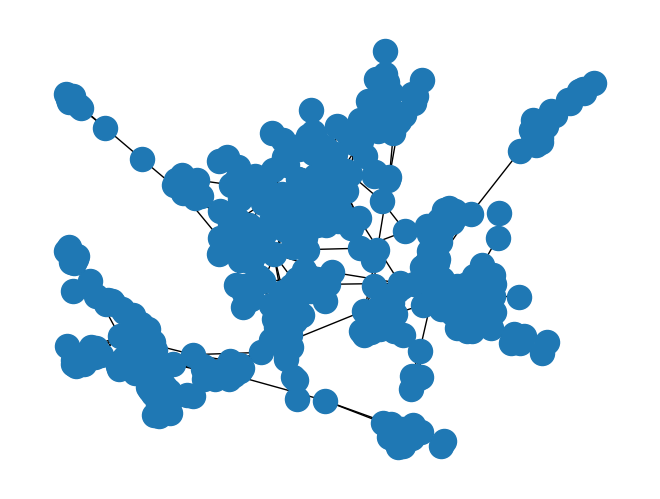

In [10]:
nx.draw(amazon_graph, with_labels=False)
plt.show()

In [30]:
# from pyvis.network import Network

colormap = plt.cm.tab20

def str_color(r,g,b,a):
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    colors = [str_color(*colormap(v)) for v in values]
    return colors

def draw_communities(coms, ax=None):
    colors = assign_colors([coms[n] for n in amazon_graph.nodes()])
    nx.draw(amazon_graph, with_labels=True, ax=ax, node_color=colors)
    ax.set_title(f"Q:{nx.community.modularity(amazon_graph, to_communities_list(coms)):.4f}")

def to_communities_list(coms):
    c_pos = {v:i for i,v in enumerate(set(coms.values()))}
    
    num_c = len(c_pos)
    com_list = [[] for _ in range(num_c)]

    for k,v in coms.items():
        com_list[c_pos[v]].append(k)

    return com_list

def to_communities_dict(coms):
    inv_map = {}
    for k, v in coms.items():
        inv_map[v] = inv_map.get(v, []) + [k]

    return inv_map

defaultdict(<class 'list'>, {'176159': [0], '401449': [0], '321619': [0], '432229': [0], '59613': [0], '430314': [0], '30962': [0], '35067': [0], '217346': [0], '295177': [0], '190765': [0], '198973': [0], '141635': [0], '258382': [0], '108892': [0], '475666': [0], '326211': [0], '504412': [0], '539292': [0], '109222': [0], '51902': [0], '150207': [0], '428737': [0], '447224': [0], '500473': [0], '365309': [0], '365354': [0], '295752': [0], '265066': [0], '285549': [0], '127928': [0], '310236': [0], '373756': [0], '211967': [0], '336905': [0], '19509': [0], '199759': [0], '74895': [0], '484561': [0], '392463': [0], '279830': [0], '423198': [0], '197919': [0], '230788': [0], '236947': [0], '46508': [0], '380338': [0], '112056': [0], '404948': [0], '179698': [0], '187924': [0], '310851': [0], '470620': [0], '452208': [0], '122517': [0], '313006': [0], '108259': [0], '268123': [0], '317367': [0], '221281': [1], '104553': [1], '383087': [1], '522378': [1], '309411': [1], '366824': [1], '20

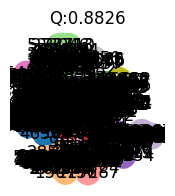

In [31]:
_,ax = plt.subplots(1,figsize=(2,2))
leiden_coms = leiden(amazon_graph).to_node_community_map()
print(leiden_coms)

coms = {k:v[0] for k,v in leiden(amazon_graph).to_node_community_map().items()}
draw_communities(coms,ax)

In [32]:
communities = leiden_algorithm(amazon_graph)
visualize_graph(amazon_graph, communities)

NameError: name 'leiden_algorithm' is not defined

In [ ]:
print(len(set(communities)))

475


# Ejercicio B – Algoritmo Evolutivo multiobjetivo

In [12]:
import networkx as nx

def create_initial_population_from_file(num_partitions):
    graph = nx.read_graphml(ROUTE_EJ_A)
    
    population = []
    nodes = list(graph.nodes())
    for _ in range(num_partitions):
        partition = random.sample(nodes, len(nodes) // num_partitions)
        population.append(partition)
    return graph, population

"""
num_partitions = 5  # Número de particiones

graph, initial_population = create_initial_population_from_file(num_partitions)
print("Initial Population:", initial_population)"""

import random
import networkx as nx
import copy
import statistics

def create_initial_population(graph, num_partitions):
    population = []
    nodes = list(graph.nodes())
    for _ in range(num_partitions):
        partition = random.sample(nodes, len(nodes) // num_partitions)
        population.append(partition)
    return population

def calculate_modularity(graph, partition):
    return nx.algorithms.community.modularity(graph, [set(partition) for partition in partition])

def select(population, fitness_function):
    tournament = random.choices(population, k=2)
    tournament_fitness = [fitness_function(individual) for individual in tournament]
    return tournament[tournament_fitness.index(max(tournament_fitness))]

def crossover(parent1, parent2):
    child = copy.deepcopy(parent1)
    for node in parent2:
        if node not in child:
            child.append(node)
    return child

def mutate(partition, mutation_rate):
    if random.random() < mutation_rate:
        node1, node2 = random.sample(partition, 2)
        partition[partition.index(node1)], partition[partition.index(node2)] = node2, node1
    return partition


def evolve(
    graph, num_partitions, mutation_rate, num_generations, trace_frequency=10
):
    population = create_initial_population(graph, num_partitions)
    
    ##############################
    # OJO: FITNESS AQUÍ A CHOLÓN #
    ##############################
    fitness_function = lambda partition: calculate_modularity(graph, partition)

    for gen in range(num_generations):
        new_population = []

        while len(new_population) < len(population):
            parent1 = select(population, fitness_function)
            parent2 = select(population, fitness_function)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        if trace_frequency > 0 and gen % trace_frequency == 0:
            best_fitness = max([fitness_function(individual) for individual in population])
            print(f"Generation {gen}: Best Fitness = {best_fitness}")

    best_partition = max(population, key=fitness_function)
    return best_partition, fitness_function(best_partition)

In [ ]:
# Uso:
# Supongamos que 'G' es tu grafo de NetworkX
best_partition, best_fitness = evolve(amazon_graph, num_partitions=7, mutation_rate=0.1, num_generations=100)
print(f"Best Partition: {best_partition}")
print(f"Best Fitness: {best_fitness}")



"""
    ERROR CAUSADO POR LOS GENES (conjetura blitty) PORQUE SON DE TAMAÑO DINÁMICO
"""

NotAPartition: [{'0', '5', '9', '2'}, {'5', '7', '8', '0', '4', '2'}, {'7', '8', '0', '3', '9', '2'}, {'0', '5', '3', '8'}, {'7', '6', '4', '8'}, {'5', '7', '1', '9', '2'}, {'5', '1', '0', '3', '4', '2'}, {'5', '7', '8', '0', '9', '2'}, {'7', '0', '3', '1'}, {'5', '2', '4', '8'}, {'5', '0', '1', '4', '2'}, {'9', '3', '6'}, {'5', '7', '8', '0', '6'}, {'0', '9', '6', '2'}, {'7', '3', '4', '1'}, {'0', '9', '2'}, {'7', '1', '3', '4', '6'}, {'7', '0', '3', '9'}, {'7', '1', '8'}, {'0', '7', '4', '8'}, {'7', '8', '1', '4', '9'}, {'1', '5', '6', '2'}, {'8', '1', '4', '9', '6', '2'}, {'5', '8', '3', '4', '9'}, {'5', '7', '1', '3', '9'}, {'8', '1', '4', '9', '2'}, {'5', '3', '4', '6', '2'}, {'5', '8', '3', '6', '2'}, {'0', '5', '2'}, {'0', '3', '6', '2'}, {'7', '5', '6', '2'}, {'7', '1', '3', '4', '6', '2'}, {'7', '3', '4', '2'}, {'7', '0', '3', '4', '6'}, {'1', '5', '9', '2'}, {'7', '0', '4', '2'}, {'5', '3', '4', '8'}, {'1', '0', '3', '6', '2'}, {'8', '1', '0', '9', '2'}, {'8', '1', '0', '9', '6'}, {'1', '9', '4', '2'}, {'0', '3', '9', '6', '2'}, {'5', '9', '4', '8'}, {'1', '3', '4', '8'}, {'1', '3', '4', '6', '2'}, {'5', '7', '8', '3', '2'}, {'5', '1', '0', '3', '4'}, {'7', '0', '6', '1'}, {'7', '9', '3', '4'}, {'1', '9'}, {'5', '7', '8', '1', '6'}, {'8', '0', '1', '3', '2'}, {'1', '8', '7', '2'}, {'1', '5', '3', '8'}, {'5', '7', '1', '9', '2'}, {'8', '1', '4', '9', '6'}, {'5', '7', '0', '3', '6'}, {'1', '2', '4', '8'}, {'0', '9', '4', '1'}, {'1', '5', '7'}, {'5', '7', '8', '4', '9'}, {'7', '1', '3', '4', '9'}, {'5', '9', '4'}, {'1', '4', '2'}, {'1', '0', '3', '4', '6', '2'}, {'5', '0', '4', '6', '2'}, {'5', '7', '3', '4', '6'}] is not a valid partition of the graph Graph with 475 nodes and 1184 edges